In [345]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


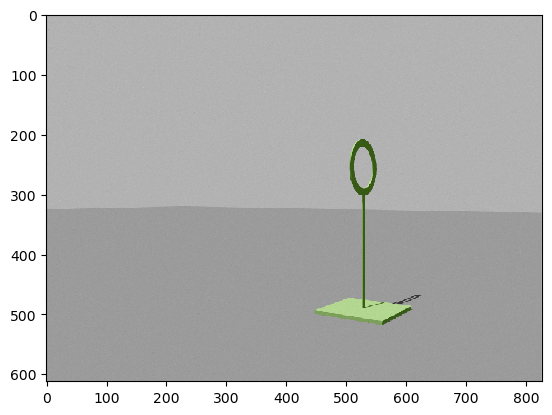

In [346]:
img = cv2.imread('images/image14.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

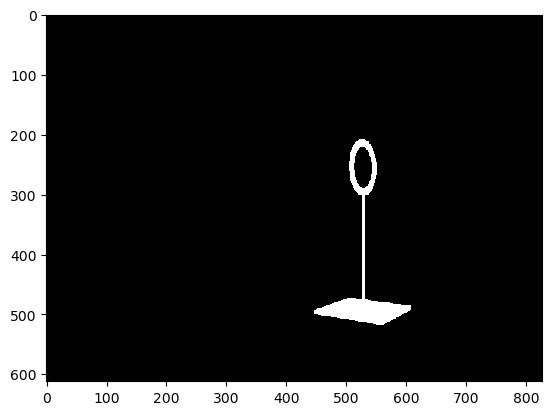

In [347]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))
plt.imshow(gates, cmap='gray')
plt.show()

In [348]:
def largest_contour_with_child(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    cont_arr = []
    for i, cont in enumerate(contours):
        # Has children?
        #if hierarchy[0][i][2] > -1:
        cont_arr.append(cont)

    sizes = []
    for cont in cont_arr:
        sizes.append(cv2.contourArea(cont))

    largest = cont_arr[np.argmax(sizes)]
    return largest

def test_defects(cont):
    hull = cv2.convexHull(cont,returnPoints = False)
    defects = cv2.convexityDefects(cont,hull)

    dist =  defects[0][0][3]/256.0

    if dist > 5:
        return False

    return True

In [349]:
def sep_closest_gate(img):
    kernel = np.ones((2,2),np.uint8)

    for i in range(50):
        cont = largest_contour_with_child(img)
        if test_defects(cont):
            print(i)
            break
        img = cv2.erode(img, kernel, iterations = 1)

    return img

In [350]:
closest_gate = sep_closest_gate(gates)

6


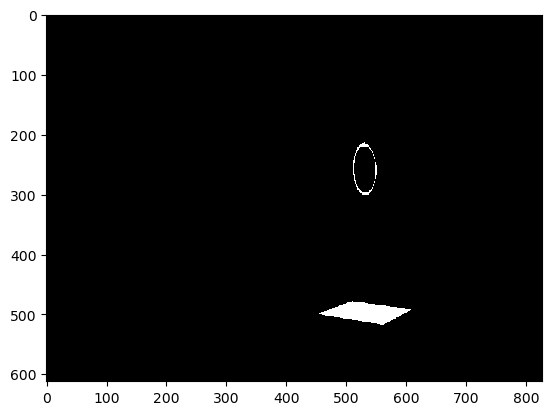

In [351]:
plt.imshow(closest_gate, cmap='gray')
plt.show()